<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Sebastián Campos ; 201773517-1 ; Nueva </h4>
    <h4> Axel Reyes ; 201773502-3; Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


In [2]:
import pandas as pd
import numpy as np
import csv


dict = {}
cont = 0
#Se abre el archivo y se comienza a leer los datos
with open('reddit.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if (cont == 0):
            cont += 1 #Contador utilizado para saltar la linea de a metadata
        elif (row[3] not in dict.keys()):
            if (row[0]) == '0':
                dict[row[3]] = -1 
            else:
                dict[row[3]] = 1
        else:
            if (row[0]) == '0':
                dict[row[3]] -=1#Se resta uno al valor de un subreddit si se encuentra un comentario no sarcastico
            else:
                dict[row[3]] +=1#Se suma uno al valor de un subreddit si se encuentra un comentario sarcastico
sarcasticos = 0
no_sarcasticos = 0
neutros = 0
#Se cuentan los subreddit con mayor cantidad de comentarios sarcasticos que no sarcastico
for value in dict.values():
    if (value > 0):
        sarcasticos += 1#Se cuentan los subreddit con mayor cantidad de comentarios sarcasticos que no sarcastico
    elif (value < 0):
        no_sarcasticos += 1 #Se cuentan los subreddit con menor cantidad de comentarios sarcasticos que no sarcastico
    else:
        neutros += 1 #se cuentan los subreddit con igual cantidad de comentarios sarcasticos como no sarcasticos
print("En el archivo csv se encontraron los siguientes resultados de un total de ", sarcasticos + no_sarcasticos + neutros, " subreddits: ")
print("Subreddits sarcasticos: ", sarcasticos)
print("Subreddits no sarcasticos: ", no_sarcasticos)
print("Subreddits neutros: ", neutros)
cont1 = 0
cont2 = 0
for key,value in dict.items():
    if (cont1 == 0):
        if (value < -1000): #Se elije un subreddit muy poco sarcastico
            print("Por ejemplo, el subreddit ", key, " posee ", value*-1, " comentarios no sarcasticos mas que sarcasticos.")
            cont1 += 1
    if (cont2 == 0):    
        if (value > 1000):#Se elije un reddit muy sarcastico
            print("Por ejemplo, el subreddit ", key, " posee ", value, " comentarios sarcasticos mas que no sarcasticos.")
            cont2 += 1
    if (cont1 == 1 and cont2 == 1):
        break

#mas negativo menos sarcastico

En el archivo csv se encontraron los siguientes resultados de un total de  14878  subreddits: 
Subreddits sarcasticos:  3823
Subreddits no sarcasticos:  9813
Subreddits neutros:  1242
Por ejemplo, el subreddit  politics  posee  8324  comentarios sarcasticos mas que no sarcasticos.
Por ejemplo, el subreddit  AskReddit  posee  12943  comentarios no sarcasticos mas que sarcasticos.


R: Existen varios subreddits en los cuales predominan un tipo de comentario sobre el otro, un ejemplo de subreddit que predominen los comentarios sarcasticos es politics, y un subreddit en el cual predominen los comentarios no sarcasticos es AskReddit.


>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

In [3]:
import pandas as pd
import numpy as np
import csv


dictsarc = {}
dictnotsarc={}
cont = 0
#Se leen los datos y se separan en dos diccionarios, un diccionario contiene el nombre del subreddit como llave y
#la cantidad de comentarios sarcasticos/no sarcasticos que contiene (dependiendo del diccionario)
with open('reddit.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if (cont == 0):
            cont += 1
        if (row[3] not in dictnotsarc.keys()):
            if (row[0] == '0'):
                dictnotsarc[row[3]]=1
        if(row[3] in dictnotsarc.keys()):
            if (row[0] == '0'):
                dictnotsarc[row[3]]+=1
        if (row[3] not in dictsarc.keys()):
            if (row[0] == '1'):
                dictsarc[row[3]]=1
        if (row[3] in dictsarc.keys()):
            if (row[0] == '1'):
                dictsarc[row[3]]+=1
#Se guardan los datos en listas como tuplas de orden (cantidad de comentarios sarcasticos/nosarcasticos,nombre)
#y se ordenan de mayor a menor        
sarcasmo=dictsarc.items()
sarcasmo2=[]
for reddit,score in sarcasmo:
    sarcasmo2.append((score,reddit))
nosarcasmo=dictnotsarc.items()
nosarcasmo2=[]
for reddit,score in nosarcasmo:
    nosarcasmo2.append((score,reddit))

sarcasmo2.sort()
sarcasmo2.reverse()
nosarcasmo2.sort()
nosarcasmo2.reverse()
#Se eligen los subreddit mas sarcasticos/menos sarcasticos
cont=0
print("TOP 10 REDDIT MAS SARCASTICOS")
for score,reddit in sarcasmo2:
    print(cont+1,".- ",reddit)
    cont+=1
    if(cont==10):
        break
print("TOP 10 REDDIT MENOS SARCASTICOS")
cont=0
for score,reddit in nosarcasmo2:
    print(cont+1,".- ",reddit)
    cont+=1
    if(cont==10):
        break


    
    


    
    


TOP 10 REDDIT MAS SARCASTICOS
1 .-  AskReddit
2 .-  politics
3 .-  worldnews
4 .-  leagueoflegends
5 .-  pcmasterrace
6 .-  news
7 .-  funny
8 .-  pics
9 .-  todayilearned
10 .-  GlobalOffensive
TOP 10 REDDIT MENOS SARCASTICOS
1 .-  AskReddit
2 .-  politics
3 .-  funny
4 .-  leagueoflegends
5 .-  worldnews
6 .-  pics
7 .-  pcmasterrace
8 .-  nfl
9 .-  news
10 .-  nba


R: Ambas listas son casi identicas exceptuando algunos casos muy específicos, esto se debe a que los reddits señalados en las lista de más arriba son de tópicos muy amplios, como por ejemplo askreddit o funny, los cuales se pueden prestar para ambos tipos de comentarios sin desvirtuar el contenido del reddit, ese mismo argumento se puede utilizar en los demas reddits repetidos. Para los reddits no repetidos, en los menos sarcasticos, se puede notar nba y nfl, los cuales al ser dos deportes especialmente populares en Estados Unidos no es extaño pensar que la gente suela tomarselos con más seriedad, en cambio, en los reddits más sarcásticos no repetidos destacan todayilearned y GlobalOffensive, el primer reddit es un espacio que puede prestarse para experiencias extrañas y extravagantes, al tratarse de un reddit donde gente comparte lo que aprendió hoy puede darse que, en general, las personas compartan experiencias no serias/ridiculas en las cuales predomine el sarcasmo, por otro lado, el reddit Global Offensive corresponde a un juego shooter competitivo con una comunidad no muy amigable precisamente, no es de extrañar que predomine bastante el sarcasmo en ese reddit.

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl 
dictsarc = {}
dictnotsarc={}
cont = 0
#Guarda el (año, mes) de un comentario como llave de un diccionario, y su valor es la cantidad de comentarios
#sarcasticos/no sarcasticos hechos en el día (en diccionarios distintos)
with open('reddit.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if (cont == 0):
            cont += 1
        else:
            linea=row[7].split("-")
            tupla=tuple(linea)
            if (tupla not in dictnotsarc.keys()):
            
                if (row[0] == '0'):
                    dictnotsarc[tupla]=1
            if(tupla in dictnotsarc.keys()):
                if (row[0] == '0'):
                    dictnotsarc[tupla]+=1
            if (tupla not in dictsarc.keys()):
                if (row[0] == '1'):
                    dictsarc[tupla]=1
            if (tupla in dictsarc.keys()):
                if (row[0] == '1'):
                   dictsarc[tupla]+=1
#Se ordenan los datos cronologicamente 
d6=[]
d5=[]
d4=[]
d3=[]
d2=[]
d1=[]
d0=[]
d9=[]
for a,m in dictsarc.keys():
    if(a=='2016'):
        d6.append((m,a))
    if(a=='2015'):
        d5.append((m,a))
    if(a=='2014'):
        d4.append((m,a))
    if(a=='2013'):
        d3.append((m,a))
    if(a=='2012'):
        d2.append((m,a))
    if(a=='2011'):
        d1.append((m,a))
    if(a=='2010'):
        d0.append((m,a))
    if(a=='2009'):
        d9.append((m,a))
d6.sort()
d5.sort()
d4.sort()
d3.sort()
d2.sort()
d1.sort()
d0.sort()
d9.sort()
d6.reverse()
d5.reverse()
d4.reverse()
d3.reverse()
d2.reverse()
d1.reverse()
d0.reverse()
d9.reverse()
superlista=d6+d5+d4+d3+d2+d1+d0+d9
otrasuperlista=[]
listafinal=[]
final3=[]
#Se agregan los datos de las fechas en dos listas separados por si son sarcasticos o no sarcasticos
#De esta forma las listas quedan ordenadas con la cantidad de comentarios sarcasticos y no sarcasticos asociados a su fecha
for m,a in superlista:
    otrasuperlista.append(dictsarc[(a,m)])
    final3.append(dictnotsarc[(a,m)])

for m,a in superlista:
    listafinal.append(str((a,m)))


listafinal.reverse()
otrasuperlista.reverse()
final3.reverse()
jaja=[]
final=[]
final2=[]
cont=0
#Se filtran los datos, dejando las fechas cada 3 meses
for element in listafinal:
    if(cont%3==0):
        final.append(element)
        cont+=1
    else:
        cont+=1
cont=0
for element in otrasuperlista:
    if(cont%3==0):
        final2.append(element)
        cont+=1
    else:
        cont+=1
cont=0
for element in final3:
    if(cont%3==0):
        jaja.append(element)
        cont+=1
    else:
        cont+=1
#Se gráfica la información
plt.figure(figsize=(40,5))
    
plt.scatter(final,final2,label="Sarcastico",c="red")
plt.scatter(final,jaja,label="No sarcastico",c="green")
plt.legend(loc="best")




plt.show()


#naranjo no sarcastico
#azul sarcastico


<Figure size 4000x500 with 1 Axes>

R:Se puede apreciar respecto a la línea de tiempo, que entre el enero de 2009 y enero del 2013 la diferencia entre los comentarios sarcasticos y no sarcasticos es ínfimas, después entre abril del 2013 y enero del 2016 los comentarios sarcasticos mostraron una superioridad frente a los no sarcasticos clara en casi todo el largo de los años (una excepción se puede notar en enero del 2014), finalmente, desde enero del 2016 hasta octubre del 2016 hubo un aumento considerable en la cantidad de comentarios no sarcasticos sobre los sarcasticos, ésto se puede deber a que durante ése año se realizaron las elecciones presidenciales en Estados Unidos.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

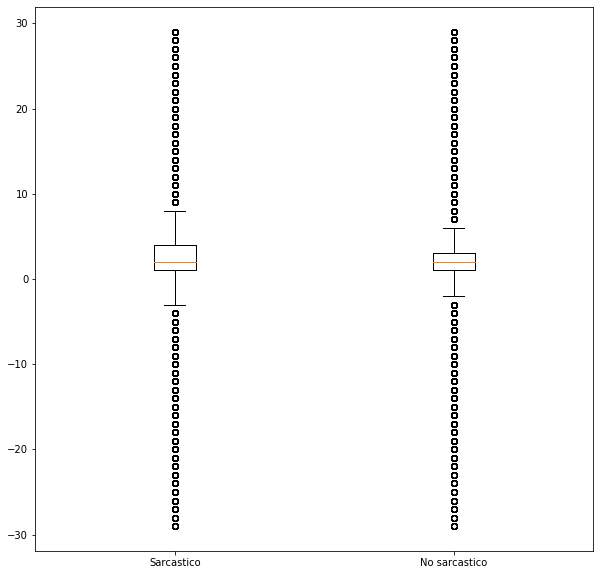

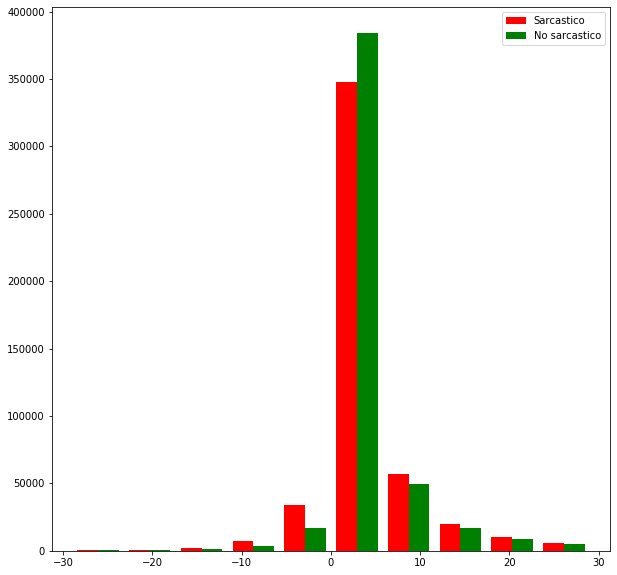

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl 


Psarcasmo=[]
Pnosarcasmo=[]
cont = 0
#Se guardan el puntaje obtenido por cada comentario sarcastico/no sarcastico en listas distintas
with open('reddit.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if (cont == 0):
            cont += 1
        elif(row[0]=='0'):
            Pnosarcasmo.append(int(row[4]))
        elif(row[0]=='1'):
            Psarcasmo.append(int(row[4]))
PPsarcasmo=[]
PPnosarcasmo=[]
#Se filtra la información mostrando el sector donde se encuentra la mayor densidad de los datos
for value in Psarcasmo:
    if (-30<value<30):
        PPsarcasmo.append(value)
for value in Pnosarcasmo:
    if(-30<value<30):
        PPnosarcasmo.append(value)
pnosarcasmo=np.asarray(PPnosarcasmo)   
psarcasmo=np.asarray(PPsarcasmo)
tomc=[psarcasmo,pnosarcasmo]
#Se grafica la información obtenida
plt.figure(figsize=(10,10))
plt.boxplot(tomc ,labels=["Sarcastico", "No sarcastico"])
plt.show()
plt.figure(figsize=(10,10))
plt.hist(tomc,label=["Sarcastico", "No sarcastico"],color=['r','g'])
plt.legend()
plt.show()



           
        
        

R: Como podemos notar tanto en el boxplot con el histograma, existe una extremadamente alta concentración de puntajes entre el 0 y el 10, donde se encuentran la mayoría de los datos, esto no es extraño si se piensa que reddit es una plataforma que recibe sientos de miles de comentarios al día, por lo que al haber una cantidad absurda de tráfico de post y comentarios, no es raro notar que muchos de esos comentarios pasen realmente desapercibidos (ya sean buenos o malos), ya que por lo general las personas al ver un post sólo ven los comentarios que se encuentran más arriba (los más votados) ignorando por lo general que hay por debajo del decimo comentario. De esta forma, una vez que uno o más comentarios ganan su puesto en la cima de la página, es muy díficil que un comentario de mucho más abajo lo supere, por lo que genera una gran cantidad de comentarios ignorados por la gente, y una pequeña cantidad de comentarios que se vuelven relevantes y con muchos votos. En cuanto a la diferencia de votos entre sarcasticos y no sarcasticos, no existe una diferencia "real" ya que para ambos tipos de comentarios ocurre lo mismo, algunos destacan y otros quedan olvidados, de todas formas, los comentarios sarcasticos tienden un poco a ser mejor calificados o peor calificados que los no sarcasticos, en cambio los no sarcasticos tienden ser más ignorados/presentar poca diferencia entre upvote y downvotes que los sarcasticos. Finalmente, como se puede notar en el boxplot, las medianas están, muy cercanas por lo que se puede deducir que si comportamiento es similar, y el sesgo que se puede notar en los datos es idéntico.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

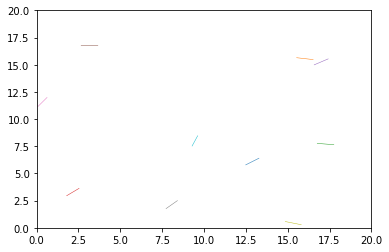

La probabilidad para N = 10 es: 0.5


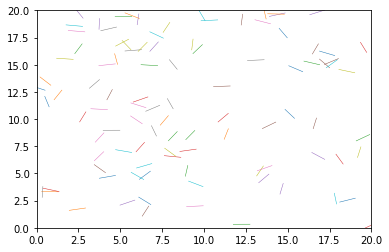

La probabilidad para N = 100 es: 0.58


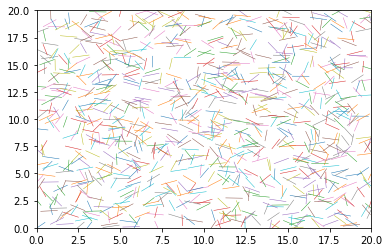

La probabilidad para N = 1000 es: 0.64


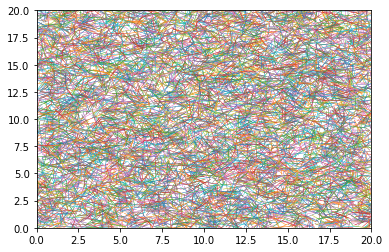

La probabilidad para N = 10000 es: 0.6307


In [6]:
import numpy as np
from numpy import pi 
import matplotlib.pyplot as plt
import random
from random import randrange
from random import uniform

# Se inicializa una lista vacía para guardar las coordenadas de las agujas que se graficaran y un contador para
# contar las agujas que atraviesan una linea horizontal

coord = []
cont = 0

# Se procede a repetir el experimento 10 veces con este for
# Se obtienen 3 floats, 1 para cada coordenada con rango entre 0 y 20, y el otro para el angulo con rango entre
# 0 y 180

# Luego haciendo int(y) y int(y+1) obtenemos las lineas horizontales inferior y superior
# respectivamente que la aguja puede cortar

# Para obtener las coordenadas de los extremos de la aguja utilizamos trigonometria, de manera que
# Sin(alfa) = cateto opuesto/hipotenusa, donde el cateto opuesto corresponde a la variacion de la coordenada y
# (delta), y la hipotenusa corresponde a la mitad del largo de la aguja (0,5)

# Analogamente se hace para obtener la variacion de la coordenada x (dx)

# Luego, se crea una lista x1 con las coordenadas x de ambos puntos, y otra lista y1 con las coordenadas y
# de ambos puntos, debido a que plt.plot pide las coordenadas de esta forma para unir 
# dos puntos del espacio, y se guardan ambas listas en forma de tupla (x1,y1) en la lista coord

# Después, se revisa si la aguja cortó alguna horizontal o no

# Finalmente, se recorre la lista coord para graficar cada aguja
# El resto de codigo es lo mismo, solo que para mayor numero de repeticiones del experimento

for i in range(10):
    x = uniform(0,20)                            
    y = uniform(0,20)
    alfa = uniform(0,180)
    inf = int(y)
    sup = int(y+1)
    delta = np.sin((alfa*pi)/180)*0.5
    dx = np.cos((alfa*pi)/180)*0.5
    x1 = [x-dx,x+dx] 
    y1 = [y-delta,y+delta]
    coord.append((x1,y1))
    if(inf >= y-delta):
        cont += 1
    elif (sup <= y+delta):
        cont +=1  

for aguja in coord:
    plt.axis([0, 20, 0, 20])
    plt.plot(aguja[0],aguja[1],linewidth=0.5)
plt.show()

print("La probabilidad para N = 10 es:", cont/10)

coord = []
cont = 0
for i in range(100):
    x = uniform(0,20)
    y = uniform(0,20)
    alfa = uniform(0,180)
    inf = int(y)
    sup = int(y+1)
    delta = np.sin((alfa*pi)/180)*0.5
    dx = np.cos((alfa*pi)/180)*0.5
    x1 = [x-dx,x+dx]
    y1 = [y-delta,y+delta]
    coord.append((x1,y1))
    if(inf >= y-delta):
        cont += 1
    elif (sup <= y+delta):
        cont +=1  

for aguja in coord:
    plt.axis([0, 20, 0, 20])
    plt.plot(aguja[0],aguja[1],linewidth=0.5)
plt.show()

print("La probabilidad para N = 100 es:", cont/100)

coord = []
cont = 0
for i in range(1000):
    x = uniform(0,20)
    y = uniform(0,20)
    alfa = uniform(0,180)
    inf = int(y)
    sup = int(y+1)
    delta = np.sin((alfa*pi)/180)*0.5
    dx = np.cos((alfa*pi)/180)*0.5
    x1 = [x-dx,x+dx]
    y1 = [y-delta,y+delta]
    coord.append((x1,y1))
    if(inf >= y-delta):
        cont += 1
    elif (sup <= y+delta):
        cont +=1  
for aguja in coord:
    plt.axis([0, 20, 0, 20])
    plt.plot(aguja[0],aguja[1],linewidth=0.5)
plt.show()

print("La probabilidad para N = 1000 es:", cont/1000)

coord = []
cont = 0
for i in range(10000):
    x = uniform(0,20)
    y = uniform(0,20)
    alfa = uniform(0,180)
    inf = int(y)
    sup = int(y+1)
    delta = np.sin((alfa*pi)/180)*0.5
    dx = np.cos((alfa*pi)/180)*0.5
    x1 = [x-dx,x+dx]
    y1 = [y-delta,y+delta]
    coord.append((x1,y1))
    if(inf >= y-delta):
        cont += 1
    elif (sup <= y+delta):
        cont +=1  
        
for aguja in coord:
    plt.axis([0, 20, 0, 20])
    plt.plot(aguja[0],aguja[1],linewidth=0.5)
plt.show()

print("La probabilidad para N = 10000 es:", cont/10000)

Para calcular la probabilidad, se obtuvieron 3 floats al azar, 2 para las coordenadas del centroide y 1 para el ángulo de la aguja respecto a la horizontal. Luego, con trigonometría se calcularon las coordenadas de los extremos de la aguja. Después, se procedió a verificar si la aguja atravesó la horizontal sobre ella o la de debajo, por lo que se truncó la coordenada Y y la de Y+1, dando así las horizontales inferior y superior respectivamente. Las coordenadas de la aguja se guardaron en una lista de manera que el comando plt.plot permitiese graficarlas después. Se procedió a repetir este proceso N veces, con N = {10,100,1000,10000,100000}, donde para N = 100000 no posee gráfico de las agujas, debido a que se demora demasiado en ejecutar (para N = 10000 ya toma un tiempo considerable ejecutarlo, alrededor de 15 segundos) y no ayudaría a concluir algo distinto.
Finalmente, la probabilidad se calcula dividiendo el contador con su respectivo valor de N.

In [7]:
import numpy as np
from numpy import pi
import random
from random import randrange
from random import uniform

# Se crea un arreglo con el numero de repeticiones que se requieren, para no tener que copiar el mismo codigo
# una y otra vez para cada caso.

# Se repite el mismo proceso para calcular probabilidad que en el codigo anterior, solo que ahora los floats para 
# las coordenadas tienen rango hasta 5, 10, 20, 30, 40, 100 y 1000

N = [10,100,1000,10000,100000]

print("En un espacio de 5x5:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,5)
        y = uniform(0,5)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 10x10:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,10)
        y = uniform(0,10)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 20x20:")
N = [10,100,1000,10000,100000]
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,20)
        y = uniform(0,20)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 30x30:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,30)
        y = uniform(0,30)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 40x40:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,40)
        y = uniform(0,40)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 100x100:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,100)
        y = uniform(0,100)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)

print("\n")
print("En un espacio de 1000x1000:")
for k in N:
    cont = 0
    for i in range(k):
        x = uniform(0,1000)
        y = uniform(0,1000)
        alfa = uniform(0,180)
        inf = int(y)
        sup = int(y+1)
        delta = np.sin((alfa*pi)/180)*0.5
        if(inf >= y-delta):
            cont += 1
        elif (sup <= y+delta):
            cont +=1
    print("La probabilidad para N =",k,"es:", cont/k)


En un espacio de 5x5:
La probabilidad para N = 10 es: 0.5
La probabilidad para N = 100 es: 0.68
La probabilidad para N = 1000 es: 0.641
La probabilidad para N = 10000 es: 0.6409
La probabilidad para N = 100000 es: 0.637


En un espacio de 10x10:
La probabilidad para N = 10 es: 1.0
La probabilidad para N = 100 es: 0.65
La probabilidad para N = 1000 es: 0.66
La probabilidad para N = 10000 es: 0.6298
La probabilidad para N = 100000 es: 0.63668


En un espacio de 20x20:
La probabilidad para N = 10 es: 0.5
La probabilidad para N = 100 es: 0.7
La probabilidad para N = 1000 es: 0.627
La probabilidad para N = 10000 es: 0.6361
La probabilidad para N = 100000 es: 0.63739


En un espacio de 30x30:
La probabilidad para N = 10 es: 0.6
La probabilidad para N = 100 es: 0.69
La probabilidad para N = 1000 es: 0.632
La probabilidad para N = 10000 es: 0.635
La probabilidad para N = 100000 es: 0.63685


En un espacio de 40x40:
La probabilidad para N = 10 es: 0.6
La probabilidad para N = 100 es: 0.59
La pr

Conclusión: La probabilidad de que una aguja atraviese una horizontal del espacio se mantiene en valores cercanos a 0.63 (excepto para N = 10, donde los resultados bastante variados debido a la poca cantidad de repeticiones del experimento), por lo que parece ser que la probabilidad es independiente de la dimensión del espacio en que se ejecuta el experimento (probando para espacios de 5x5, 10x10, 20x20, 30x30, 40x40, 100x100 y 1000x1000).

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

In [8]:
import numpy as np
#Se realiza la matiz de transición
M= np.array([[0.65,0.20,0.15],[0.3,0.4,0.3],[0.1,0.2,0.7]])
print("MATRIZ DE TRANSICIÓN")
print("  |S    L    W")
print("  ---------------")
print("S |"+str(M[0][0])+" "+str(M[0][1])+" "+str(M[0][2])+"\n")
print("L |"+str(M[1][0])+"  "+str(M[1][1])+"  "+str(M[1][2])+"\n")
print("W |"+str(M[2][0])+"  "+str(M[2][1])+"  "+str(M[2][2])+"\n")
#Se realiza la matriz de estado inicial
M2=np.array([[200/400,180/400,20/400]])
print("MATRIZ DE ESTADO INICIAL")
print("  S  |  L  |  W")
print(str(M[0][0])+" | "+str(M[0][1])+" | "+str(M[0][2]))






MATRIZ DE TRANSICIÓN
  |S    L    W
  ---------------
S |0.65 0.2 0.15

L |0.3  0.4  0.3

W |0.1  0.2  0.7

MATRIZ DE ESTADO INICIAL
  S  |  L  |  W
0.65 | 0.2 | 0.15


>**O:** b) Haga un diagrama de transición 

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

In [9]:
import numpy as np

M= np.array([[0.65,0.20,0.15],[0.3,0.4,0.3],[0.1,0.2,0.7]])
M2=np.array([[200/400,180/400,20/400]])
M3=np.array([[""]])

flag=1
#Se realiza un loop de multiplicación de matrices hasta encontrar la matiz estacionaria.
while(flag):
    M3=M2.dot(M)
    if((M3==M2).all()):
        flag=0
    else:
        M2=M3
print(M3)    

    


[[0.33333333 0.25       0.41666667]]


>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)